Chap3 EX

In [15]:
import sklearn
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(42)
%matplotlib inline

## 1. An MNIST Classifier With Over 97% Accuracy

Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).

In [23]:
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [24]:
mnist = fetch_openml('mnist_784', version = 1, as_frame=False)

In [25]:
X, y = mnist['data'], mnist['target']
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [26]:
knn_clf = KNeighborsClassifier()

param_grid = [{'weights':["uniform", "distance"],
              'n_neighbors':[3,4,5]}]
grid_search = GridSearchCV(knn_clf,param_grid,cv=5,verbose=3)

In [27]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  21.3s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  19.4s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  19.8s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  32.4s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  19.9s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  19.7s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  19.3s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  17.2s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  16.9s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  16.9s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  19.9s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [29]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [30]:
grid_search.best_score_

0.9716166666666666

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
y_pred = grid_search.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred)

0.9714

## 2. Data Augmentation

Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel.5 Then, for each image in the training set, create four shif‐ted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set.
You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.5

## 3. Tackle the Titanic dataset

The goal is to predict whether or not a passenger survived based on attributes such as their age, sex, passenger class, where they embarked and so on.

In [36]:
train_data = pd.read_csv('../data/titanic_train.csv')
test_data = pd.read_csv('../data/titanic_test.csv')

In [38]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The attributes have the following meaning:
* **Survived**: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
* **Pclass**: passenger class.
* **Name**, **Sex**, **Age**: self-explanatory
* **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
* **Parch**: how many children & parents of the passenger aboard the Titanic.
* **Ticket**: ticket id
* **Fare**: price paid (in pounds)
* **Cabin**: passenger's cabin number
* **Embarked**: where the passenger embarked the Titanic

In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The **Age**, **Cabin** and **Embarked** attributes are sometimes null (less than 891 non-null), especially the **Cabin** (77% are null):
    
- We will ignore the **Cabin** for now and focus on the rest.
- The **Age** attribute has about 19% null values, so we will need to decide what to do with them. Replacing null values with the median age seems reasonable.

The **Name** and **Ticket** attributes may have some value, but they will be a bit tricky to convert into useful numbers that a model can consume. So for now, we will ignore them.

Let's take a look at the numerical attributes:

In [40]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [43]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [44]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [45]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

The Embarked attribute tells us where the passenger embarked: C=Cherbourg, Q=Queenstown, S=Southampton.

**Note**: the code below uses a mix of `Pipeline`, `FeatureUnion` and a custom `DataFrameSelector` to preprocess some columns differently.  Since Scikit-Learn 0.20, it is preferable to use a `ColumnTransformer`, like in the previous chapter.

Now let's build our preprocessing pipelines. We will reuse the `DataframeSelector` we built in the previous chapter to select specific attributes from the `DataFrame`:

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin

In [47]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names]

In [48]:
# Make pipeline:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [49]:
num_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch","Fare"])),
    ("imputer", SimpleImputer(strategy="median")),
])

In [50]:
num_pipeline.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [52]:
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X,y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index = X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [53]:
from sklearn.preprocessing import OneHotEncoder

In [56]:
cat_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(["Pclass","Sex","Embarked"])),
    ("imputer",MostFrequentImputer()),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

In [57]:
cat_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [59]:
# Join the numerical and categorical piplines:
from sklearn.pipeline import FeatureUnion

In [60]:
preprocess_pipeline = FeatureUnion(
    transformer_list=[
        ("num_pipeline",num_pipeline),
        ("cat_pipeline",cat_pipeline)
])

In [61]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [63]:
y_train = train_data["Survived"]

In [64]:
from sklearn.svm import SVC

In [65]:
svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train, y_train)

SVC(gamma='auto')

In [67]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = svm_clf.predict(X_test)

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
svm_scores = cross_val_score(svm_clf, X_train, y_train,cv=10)

In [70]:
svm_scores.mean()

0.7329588014981274

better than random but not great choice, intro`RandomForest`

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train,cv=10)
forest_scores.mean()

0.8126466916354558

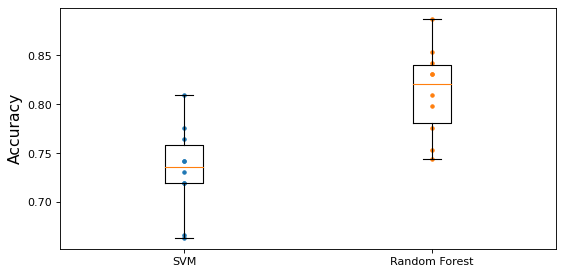

In [78]:
_,ax = plt.subplots(figsize=(8,4),dpi=80)
ax.plot([1] * 10,svm_scores, ".")
ax.plot([2] * 10,forest_scores, ".")
ax.boxplot([svm_scores, forest_scores],labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

In [80]:
train_data["AgeBucket"] = train_data["Age"] // 15 * 15
train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [81]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


## 4. Build a spam classifier (a more challenging exercise): 

- Download examples of spam and ham from [Apache SpamAssassin’s public datasets](https://homl.info/spamassassin).
- Unzip the datasets and familiarize yourself with the data format.
- Split the datasets into a training set and a test set.
- Write a data preparation pipeline to convert each email into a feature vector.

Your preparation pipeline should transform an email into a (sparse) vector that indicates the presence or absence of each possible word. For example, if all emails only ever contain four words, “Hello,” “how,” “are,” “you,” then the email “Hello you Hello Hello you” would be converted into a vector [1, 0, 0, 1] (meaning [“Hello” is present, “how” is absent, “are” is absent, “you” is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word.
You may want to add hyperparameters to your preparation pipeline to control whether or not to strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with “URL,” replace all numbers with “NUMBER,” or even perform stemming (i.e., trim off word endings; there are Python libraries available to do this).
Finally, try out several classifiers and see if you can build a great

please use **easy_ham_2**

In [109]:
import os
import tarfile
import urllib.request

In [146]:
DOWNLOAD_ROOT = "https://spamassassin.apache.org/old/publiccorpus"
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham_2.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets", "spam")

In [147]:
def fetch_spam_data(ham_url=HAM_URL, spam_url=SPAM_URL, spam_path=SPAM_PATH):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename, url in (("ham.tar.bz2", ham_url), ("spam.tar.bz2", spam_url)):
        path = os.path.join(spam_path, filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url, path)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path=spam_path)
        tar_bz2_file.close()

In [148]:
fetch_spam_data()

In [150]:
HAM_DIR = os.path.join(SPAM_PATH, "easy_ham_2")
SPAM_DIR = os.path.join(SPAM_PATH, "spam")
ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]

In [151]:
len(ham_filenames)

1400

In [152]:
len(spam_filenames)

500

We can use Python's `email` module to parse these emails (this handles headers, encoding, and so on):

In [156]:
import email
import email.policy

In [157]:
def load_email(is_spam, filename, spam_path = SPAM_PATH):
    directory = "spam" if is_spam else "easy_ham_2"
    with open(os.path.join(spam_path,directory,filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [158]:
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]

Let's look at one example of ham and one example of spam, to get a feel of what the data looks like:

In [179]:
ham_emails[1],spam_emails[6]

(<email.message.EmailMessage at 0x7f9f1eb8fcd0>,
 <email.message.EmailMessage at 0x7f9f1ffa2820>)

In [181]:
def get_email_strure(email):
    if isinstance(email,str):
        return email
    payload = email.get_payload()
    if isinstance(payload, list):
        return "multipart({})".format(", ".join([get_email_structure(sub_email) for sub_email in payload]))
    else:
        return email.get_content_type()

In [182]:
from collections import Counter

In [183]:
def strcutures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] += 1
    return structures

In [184]:
structures_counter(ham_emails).most_common()

[('text/plain', 1343),
 ('multipart(text/plain, application/pgp-signature)', 35),
 ('multipart(text/plain, text/html)', 12),
 ('text/html', 2),
 ('multipart(text/plain, application/x-patch)', 1),
 ('multipart(multipart(text/plain, multipart(text/plain), text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(multipart(text/plain, text/html), image/jpeg, image/gif, image/gif, image/gif, image/gif)',
  1),
 ('multipart(text/plain, application/ms-tnef)', 1),
 ('multipart(text/plain, text/plain, text/plain)', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 1)]

In [185]:
structures_counter(spam_emails).most_common()

[('text/plain', 218),
 ('text/html', 183),
 ('multipart(text/plain, text/html)', 45),
 ('multipart(text/html)', 20),
 ('multipart(text/plain)', 19),
 ('multipart(multipart(text/html))', 5),
 ('multipart(text/plain, image/jpeg)', 3),
 ('multipart(text/html, application/octet-stream)', 2),
 ('multipart(text/plain, application/octet-stream)', 1),
 ('multipart(text/html, text/plain)', 1),
 ('multipart(multipart(text/html), application/octet-stream, image/jpeg)', 1),
 ('multipart(multipart(text/plain, text/html), image/gif)', 1),
 ('multipart/alternative', 1)]

It seems that the ham emails are more often plain text, while spam has quite a lot of HTML. Moreover, quite a few ham emails are signed using PGP, while no spam is. In short, it seems that the email structure is useful information to have.

In [186]:
for header, value in spam_emails[0].items():
    print(header, ":", value)

Return-Path : <12a1mailbot1@web.de>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 136B943C32	for <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)
Received : from dd_it7 ([210.97.77.167])	by webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 13:09:41 +0100
From : 12a1mailbot1@web.de
Received : from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);	 Sat, 24 Aug 2002 09:42:10 +0900
To : dcek1a1@netsgo.com
Subject : Life Insurance - Why Pay More?
Date : Wed, 21 Aug 2002 20:31:57 -1600
MIME-Version : 1.0
Message-ID : <0103c1042001882DD_IT7@dd_it7>
Content-Type : text/html; charset="iso-8859-1"
Content-Transfer-Encoding : qu

In [189]:
spam_emails[0]["subject"]

'Life Insurance - Why Pay More?'

In [190]:
from sklearn.model_selection import train_test_split

In [193]:
X = np.array(ham_emails + spam_emails,dtype = object)
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails))

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Okay, let's start writing the preprocessing functions.

First, we will need a function to convert HTML to plain text. Arguably the best way to do this would be to use the great [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/) library, but I would like to avoid adding another dependency to this project, so let's hack a quick & dirty solution using **regular expressions** (at the risk of [un̨ho͞ly radiańcé destro҉ying all enli̍̈́̂̈́ghtenment](https://stackoverflow.com/a/1732454/38626)). 

The following function first drops the `<head>` section, then converts all `<a>` tags to the word HYPERLINK, then it gets rid of all HTML tags, leaving only the plain text. 

For readability, it also replaces multiple newlines with single newlines, and finally it unescapes html entities (such as `&gt;` or `&nbsp;`):

In [195]:
import re
from html import unescape

In [198]:
def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags=re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
    return unescape(text)

In [199]:
html_spam_emails = [email for email in X_train[y_train==1]
                    if get_email_structure(email) == "text/html"]
sample_html_spam = html_spam_emails[7]
print(sample_html_spam.get_content().strip()[:1000], "...")

<html>
<head>
</head>
<body>

<center>
<font face="times" size="6" color="#000000">Save up to

<font color="#ff0000">75%</font> on your Term Life
Insurance!</font>
<br>  
<font face="times" size="4" color="#000000">
<i>Compare rates from top insurance companies around
the country</i></font>
<br><br>
<font face="arial" size="4" color="#7084D6">
<b>In our life and times, it's important to plan for
your family's future, while 
<br>being comfortable financially.  Choose the right
Life Insurance policy today.</font>
<p>
<font face="arial" size="3" color="#000000">
<i>Click the link below to compare the lowest rates
and save up to <font
color="#ff0000">75%</font></i></b></font>  
<p>
<a
href="http://insurancequotesource.com/user0202/termquotes/473400/"><font
face="arial"
size="4">
<b>COMPARE YOUR COVERAGE</b></font></a>
<p>
<font face="times" size="5" color="#000000">
You'll be able to compare rates and get a free
application in <i>less than a minute!</i></font>
<p>
<font face="arial" size="

In [200]:
print(html_to_plain_text(sample_html_spam.get_content())[:1000],"...")


Save up to
75% on your Term Life
Insurance!
Compare rates from top insurance companies around
the country
In our life and times, it's important to plan for
your family's future, while
being comfortable financially.  Choose the right
Life Insurance policy today.
Click the link below to compare the lowest rates
and save up to 75%
 HYPERLINK
COMPARE YOUR COVERAGE
You'll be able to compare rates and get a free
application in less than a minute!
*Get your FREE instant quotes...
*Compare the lowest prices, then...
*Select a company and Apply Online.
 HYPERLINK
GET A FREE QUOTE NOW!
You can't predict the future, but you can always
prepare for it.
 HYPERLINK to be
excluded from future contacts
tuckers
 ...


In [202]:
def email_to_text(email):
    html = None
    for part in email.walk():
        ctype = part.get_content_type()
        if not ctype in ("text/plain", "text/html"):
            continue
        try:
            content = part.get_content()
        except: # in case of encoding issues
            content = str(part.get_payload())
        if ctype == "text/plain":
            return content
        else:
            html = content
    if html:
        return html_to_plain_text(html)

In [203]:
print(email_to_text(sample_html_spam)[:100],"...")


Save up to
75% on your Term Life
Insurance!
Compare rates from top insurance companies around
the c ...


Let's throw in some stemming!

For this to work, you need to install the Natural Language Toolkit ([NLTK](http://www.nltk.org/)).


It's as simple as running the following command (don't forget to activate your virtualenv first; if you don't have one, you will likely need administrator rights, or use the `--user` option):

`mis nltk`

In [204]:
try:
    import nltk
    
    stemmer = nltk.PorterStemmer()
    for word in ("Computations", "Computation", "Computing", "Computed", "Compute", "Compulsive"):
        print(word, "=>", stemmer.stem(word))

except ImportError:
    print("Error:stemming requires the NLTK module.")
    stemmer = None

Computations => comput
Computation => comput
Computing => comput
Computed => comput
Compute => comput
Compulsive => compuls


We will also need a way to replace URLs with the word "URL". For this, we could use hard core [regular expressions](https://mathiasbynens.be/demo/url-regex) but we will just use the [urlextract](https://github.com/lipoja/URLExtract) library. You can install it with the following command (don't forget to activate your virtualenv first; if you don't have one, you will likely need administrator rights, or use the `--user` option):

`mis urlextract`

In [205]:
try:
    import urlextract # may require an Internet connection to download root domain names
    
    url_extractor = urlextract.URLExtract()
    print(url_extractor.find_urls("Will it detect github.com and https://youtu.be/7Pq-S557XQU?t=3m32s"))
except ImportError:
    print("Error: replacing URLs requires the urlextract module.")
    url_extractor = None

Error: replacing URLs requires the urlextract module.


In [206]:
from sklearn.base import BaseEstimator, TransformerMixin

class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers=True, lower_case=True, remove_punctuation=True,
                 replace_urls=True, replace_numbers=True, stemming=True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_transformed = []
        for email in X:
            text = email_to_text(email) or ""
            if self.lower_case:
                text = text.lower()
            if self.replace_urls and url_extractor is not None:
                urls = list(set(url_extractor.find_urls(text)))
                urls.sort(key=lambda url: len(url), reverse=True)
                for url in urls:
                    text = text.replace(url, " URL ")
            if self.replace_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', 'NUMBER', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            word_counts = Counter(text.split())
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter()
                for word, count in word_counts.items():
                    stemmed_word = stemmer.stem(word)
                    stemmed_word_counts[stemmed_word] += count
                word_counts = stemmed_word_counts
            X_transformed.append(word_counts)
        return np.array(X_transformed)

In [207]:
X_few = X_train[:3]
X_few_wordcounts = EmailToWordCounterTransformer().fit_transform(X_few)
X_few_wordcounts

array([Counter({'camram': 18, 'the': 16, 'number': 14, 'to': 14, 'spam': 9, 'org': 9, 'a': 9, 'and': 8, 'framework': 7, 'in': 7, 'for': 6, 'of': 6, 'it': 6, 'forward': 5, 'com': 5, 'list': 5, 'mail': 5, 'adam': 5, 'address': 5, 'text': 4, 'usual': 4, 'use': 4, 'work': 4, 'e': 4, 'they': 4, 'email': 4, 'espac': 3, 'net': 3, 'subject': 3, 'hashcash': 3, 'is': 3, 'http': 3, 'with': 3, 'end': 3, 'begin': 2, 'date': 2, 'aug': 2, 'from': 2, 'feargha': 2, 'anoth': 2, 'relat': 2, 'repli': 2, 'sender': 2, 'help': 2, 'by': 2, 'deliv': 2, 'back': 2, 'cypherspac': 2, 'like': 2, 'proof': 2, 'junk': 2, 'look': 2, 'at': 2, 'propos': 2, 'proxi': 2, 'etc': 2, 'architectur': 2, 'on': 2, 'white': 2, 'target': 2, 'revok': 2, 'ident': 2, 'lwpa': 2, 'what': 2, 'postag': 2, 'free': 2, 'token': 2, 'you': 2, 'can': 2, 'will': 2, 'still': 2, 'some': 2, 'corpor': 2, 'unsubscrib': 2, 'ibuc': 2, 'sun': 1, 'mckay': 1, 'mac': 1, 'fwd': 1, 'peopl': 1, 'contact': 1, 'run': 1, 'ezmlm': 1, 'x': 1, 'no': 1, 'archiv': 1, 

In [208]:
from scipy.sparse import csr_matrix

class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vocabulary_size=1000):
        self.vocabulary_size = vocabulary_size
    def fit(self, X, y=None):
        total_count = Counter()
        for word_count in X:
            for word, count in word_count.items():
                total_count[word] += min(count, 10)
        most_common = total_count.most_common()[:self.vocabulary_size]
        self.vocabulary_ = {word: index + 1 for index, (word, count) in enumerate(most_common)}
        return self
    def transform(self, X, y=None):
        rows = []
        cols = []
        data = []
        for row, word_count in enumerate(X):
            for word, count in word_count.items():
                rows.append(row)
                cols.append(self.vocabulary_.get(word, 0))
                data.append(count)
        return csr_matrix((data, (rows, cols)), shape=(len(X), self.vocabulary_size + 1))

In [209]:
vocab_transformer = WordCounterToVectorTransformer(vocabulary_size=10)
X_few_vectors = vocab_transformer.fit_transform(X_few_wordcounts)
X_few_vectorsvocab_transformer = WordCounterToVectorTransformer(vocabulary_size=10)
X_few_vectors = vocab_transformer.fit_transform(X_few_wordcounts)
X_few_vectors

<3x11 sparse matrix of type '<class 'numpy.int64'>'
	with 26 stored elements in Compressed Sparse Row format>

In [210]:
X_few_vectors.toarray()

array([[334,   8,  14,  14,   9,  16,   6,   4,   6,   7,   2],
       [334,  11,  13,  21,   8,   4,   8,  10,   7,   5,  19],
       [ 66,   3,   0,   0,   0,   3,   2,   0,   0,   0,   0]])

In [211]:
vocab_transformer.vocabulary_

{'and': 1,
 'number': 2,
 'to': 3,
 'a': 4,
 'the': 5,
 'of': 6,
 'email': 7,
 'for': 8,
 'in': 9,
 'you': 10}

In [213]:
from sklearn.pipeline import Pipeline

In [214]:
preprocess_pipeline = Pipeline([
    ("email_to_wordcount", EmailToWordCounterTransformer()),
    ("wordcount_to_vector", WordCounterToVectorTransformer()),
])

X_train_transformed = preprocess_pipeline.fit_transform(X_train)

In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [217]:
log_clf = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
score = cross_val_score(log_clf, X_train_transformed, y_train, cv=3, verbose=3)
score.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.982) total time=   0.4s
[CV] END ................................ score: (test=0.978) total time=   0.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] END ................................ score: (test=0.986) total time=   0.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s finished


0.9822394253832382

In [218]:
from sklearn.metrics import precision_score, recall_score

In [219]:
X_test_transformed = preprocess_pipeline.transform(X_test)

log_clf = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
log_clf.fit(X_train_transformed, y_train)

y_pred = log_clf.predict(X_test_transformed)

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))

Precision: 99.09%
Recall: 100.00%
